# 

### Database

- [Earth2014](http://ddfe.curtin.edu.au/models/Earth2014/) (Arc‐min shape, topography, bedrock and ice‐sheet models)
- Rivers are extracted from dem data (earth2014.5min, TRR) by topotoolbox

### Software

- [TopoToolbox](https://topotoolbox.wordpress.com/) (Topographic analysis tool)




In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np

### load river data from mat file

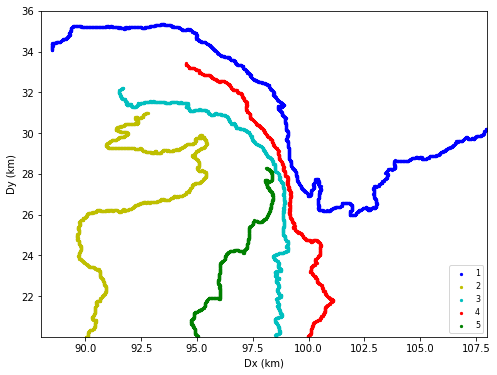

In [4]:
rivers = [1,2,3,4,5] # 'Yangtz','Mekong','Salween'
xlim_v = (88+1/120,108+1/120)
ylim_v = (20+1/120,36+1/120)

labels= ['1','2','3','4','5'] # ['Yangtz','Mekong','Salween']
colors =['b','y','c','r','g']

river_dxdy =[]

Fig1, (f1) = plt.subplots(1,1,figsize=(8,6))
for i in range(0,len(rivers)):
    fname = 'data_rivers/mat/river_xyd'+str(rivers[i])+'.mat'
    data  = scio.loadmat(fname) 
    
    dx = data["river_x"]
    #index_NaN = np.where(np.isnan(dx))
    #dx = np.delete(dx,index_NaN)
    dx = dx.T
    
    dy = data['river_y'] 
    #dy = np.delete(dy,index_NaN)
    #elev[np.where(np.isnan(elev))]=elev[:,int(np.where(np.isnan(elev))[:][1]-1000)] 
    dy = dy.T
    
    river_dxdy.append([dx,dy])
        
    label = labels[i]
    color = colors[i]
    
#     elev_smooth = moving_average(interval = dx.flatten(), window_size =window_size)
#     f1.plot(dist[window_size:len(dist)],elev_smooth[window_size:len(dist)],label=label,color=color)
    #f1.plot(dx,dy,label=label,color=color)
    f1.scatter(dx,dy,label=label,color=color,s =5)

f1.set_xlabel("Dx (km)")
f1.set_ylabel("Dy (km)")
f1.set_xlim(xlim_v)
f1.set_ylim(ylim_v)
plt.legend(loc = 'lower right',prop = {'size':8}) 

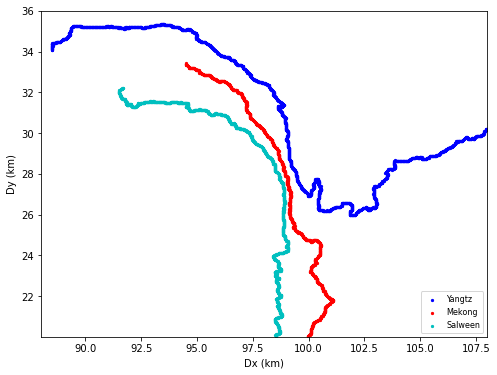

In [23]:
rivers = [1,4,3] # 'Yangtz','Mekong','Salween'
xlim_v = (88+1/120,108+1/120)
ylim_v = (20+1/120,36+1/120)

labels= ['Yangtz','Mekong','Salween']
labels2= ['Yz','Mk','Sw']
colors =['b','r','c']

river_dxdy =[]

Fig1, (f1) = plt.subplots(1,1,figsize=(8,6))
for i in range(0,len(rivers)):
    fname = 'data_rivers/mat/river_xyd'+str(rivers[i])+'.mat'
    data  = scio.loadmat(fname) 
    
    dx = data["river_x"]
    dx = dx.T
    
    dy = data['river_y'] 
    dy = dy.T
    
    dis = data['river_d'] 
    dis = dis.T
    
    river_dxdy.append([dx,dy,dis])
    
    f1.scatter(dx,dy,label=labels[i],color=colors[i],s =5)
    
    fname_save = "data_rivers/River"+labels2[i]+'0.txt'
    np.savetxt(fname_save, np.column_stack((dx.T,dy.T,dis.T)),fmt='%3.8f %3.8f %3.8f')
    
f1.set_xlabel("Dx (km)")
f1.set_ylabel("Dy (km)")
f1.set_xlim(xlim_v)
f1.set_ylim(ylim_v)
plt.legend(loc = 'lower right',prop = {'size':8}) 

### reorganize the river data

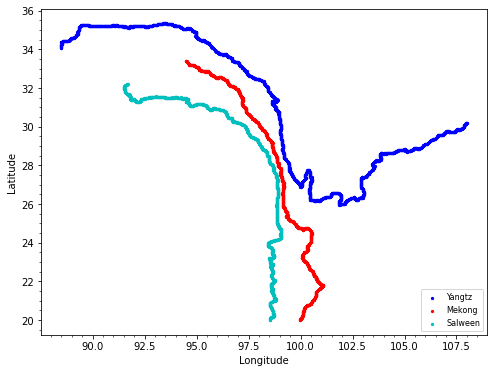

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude') #, yticks=yticks, xticks=xticks)
ax.minorticks_on()
#ax.set_title(fname_fig)
#ax.axis(extent_fig)

for i in range(0,len(labels)):
    fname_load = "data_rivers/River"+labels2[i]+'0.txt'
    river_xyo = np.loadtxt(fname_load)
    
    river_xyo = river_xyo[np.lexsort(-river_xyo.T)]
    
    dx = river_xyo[:,0]
    dy = river_xyo[:,1]
    
    fname_save = "data_rivers/River"+labels2[i]+'.txt'
    np.savetxt(fname_save, np.column_stack((river_xyo[:,0],river_xyo[:,1],river_xyo[:,2])),fmt='%3.8f %3.8f %3.8f')
    
    
    ax.scatter(dx,dy,label=labels[i],color=colors[i],s =5)
plt.legend(loc = 'lower right',prop = {'size':8}) 

### Check the river data (compare with cartopy)

In [36]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [37]:
# cartopy parameters
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                                      edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                           edgecolor=(0.0,0.0,0.0),
                           facecolor="none")
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor="blue", facecolor="blue")
prj_base  = ccrs.PlateCarree() 

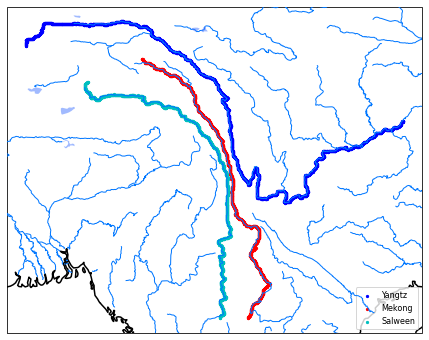

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude') #, yticks=yticks, xticks=xticks)
ax.minorticks_on()
#ax.set_title(fname_fig)
#ax.axis(extent_fig)
ax = plt.axes(projection=prj_base)

for i in range(0,len(labels)):
    fname_load = "data_rivers/River"+labels2[i]+'.txt'
    river_xyo = np.loadtxt(fname_load)
    
    dx = river_xyo[:,0]
    dy = river_xyo[:,1]
 
    ax.scatter(dx,dy,label=labels[i],color=colors[i],s =5)
plt.legend(loc = 'lower right',prop = {'size':8}) 
ax.add_feature(coastline, linewidth=1.5, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
ax.add_feature(lakes,     linewidth=0,   edgecolor="Blue", facecolor="#4477FF", zorder=7, alpha=0.5)